# Collect results from multiple runs of `jaxmodel.ipynb` 

In [1]:
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [2]:
# papermill params
results_dir = 'papermill_results/'

In [3]:
# recurse through the subdirectories, parsing the directory name, and adding it to the dataframe
keys = []
mut_df_collection = pd.DataFrame()
for dir in glob.glob(f'{results_dir}*/'):
    mut_df = pd.read_csv(f"{dir}/mutations_df.csv")
    for annotation in dir.split("/")[-2].split("--"):
        key, val = annotation.split("=")
        keys.append(key)
        mut_df[key] = val
    mut_df_collection = pd.concat([mut_df_collection, mut_df])
mut_df_collection

,mutation,wts,sites,muts,times_seen_Delta,times_seen_Omicron_BA1,times_seen_Omicron_BA2,beta_Delta,shift_Delta,beta_Omicron_BA1,shift_Omicron_BA1,beta_Omicron_BA2,shift_Omicron_BA2,fusionreg,global_epistasis,l2reg,replicate
0,M1F,M,1,F,3,0,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.0,Sigmoid,0.0001,2
1,M1I,M,1,I,9,3,5,-4.538610,0.000000,-4.538610,0.0,-4.538610,0.000000,4.0,Sigmoid,0.0001,2
2,M1K,M,1,K,4,0,0,-0.826895,-0.826895,0.000000,0.0,0.000000,0.000000,4.0,Sigmoid,0.0001,2
3,M1L,M,1,L,6,0,1,-1.015317,-1.015317,0.000000,0.0,-0.008765,-0.008765,4.0,Sigmoid,0.0001,2
4,M1R,M,1,R,0,0,1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.0,Sigmoid,0.0001,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,S1252T,S,1252,T,24,60,76,-0.255288,-0.055944,-0.199344,0.0,-0.136697,0.062647,1.0,Sigmoid,0.0001,2
9788,S1252V,S,1252,V,13,47,56,0.068304,-0.175973,0.244277,0.0,0.073184,-0.171094,1.0,Sigmoid,0.0001,2
9789,S1252W,S,1252,W,7,20,28,0.403426,0.174560,0.228866,0.0,0.235827,0.006962,1.0,Sigmoid,0.0001,2
9790,S1252Y,S,1252,Y,31,71,135,0.232578,-0.273174,0.505753,0.0,0.325165,-0.180587,1.0,Sigmoid,0.0001,2


Filter to mutations that are present in all replicates and all conditions.

In [4]:
# we count the number of rows with this mutation and require that that number is maximal (all replicates and parameter sets), and that the times_seen is all non-zero
muts_to_keep = (mut_df_collection.mutation.value_counts() == mut_df_collection.mutation.value_counts().max())
muts_to_keep = muts_to_keep.loc[muts_to_keep].index

mut_df_collection.query("mutation in @muts_to_keep", inplace=True)

mut_df_collection.query("times_seen_Delta > 0 & times_seen_Omicron_BA1 > 0 & times_seen_Omicron_BA2 > 0", inplace=True)

mut_df_collection

,mutation,wts,sites,muts,times_seen_Delta,times_seen_Omicron_BA1,times_seen_Omicron_BA2,beta_Delta,shift_Delta,beta_Omicron_BA1,shift_Omicron_BA1,beta_Omicron_BA2,shift_Omicron_BA2,fusionreg,global_epistasis,l2reg,replicate
1,M1I,M,1,I,9,3,5,-4.538610,0.000000,-4.538610,0.0,-4.538610,0.000000,4.0,Sigmoid,0.0001,2
9,F2L,F,2,L,10,5,13,0.293217,0.330506,-0.037289,0.0,0.141469,0.178758,4.0,Sigmoid,0.0001,2
11,F2S,F,2,S,1,9,9,-0.035111,0.000000,-0.035111,0.0,-0.035111,0.000000,4.0,Sigmoid,0.0001,2
12,F2V,F,2,V,1,3,2,-0.054963,0.000000,-0.054963,0.0,-0.054963,0.000000,4.0,Sigmoid,0.0001,2
13,F2Y,F,2,Y,1,1,2,-0.261631,0.000000,-0.261631,0.0,-0.065583,0.196048,4.0,Sigmoid,0.0001,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,S1252R,S,1252,R,7,48,50,0.205601,0.000000,0.205601,0.0,0.196288,-0.009312,1.0,Sigmoid,0.0001,2
9787,S1252T,S,1252,T,24,60,76,-0.255288,-0.055944,-0.199344,0.0,-0.136697,0.062647,1.0,Sigmoid,0.0001,2
9788,S1252V,S,1252,V,13,47,56,0.068304,-0.175973,0.244277,0.0,0.073184,-0.171094,1.0,Sigmoid,0.0001,2
9789,S1252W,S,1252,W,7,20,28,0.403426,0.174560,0.228866,0.0,0.235827,0.006962,1.0,Sigmoid,0.0001,2


In [5]:
mut_df_collection.query("muts == '-'").shape[0]

0

In [6]:
mut_df_collection['fusionreg'] = mut_df_collection['fusionreg'].astype(float)
mut_df_collection['l2reg'] = mut_df_collection['l2reg'].astype(float)

In [7]:
# make the mutation collection of parameter values tall for easier plotting
id_vars = ["mutation", "wts", "sites", "muts"] + list(set(keys)) #+ [c for c in mut_df_collection.columns if "times_seen" in c]
parameters = [c for c in mut_df_collection.columns if ("beta" in c) or ("shift" in c)]
tall_mut_df_collection = (
    mut_df_collection
    .melt(
        id_vars=id_vars,
        value_vars=parameters,
        var_name="parameter",
        value_name="value",
    )
    .pivot_table(
        index=list(set(id_vars + ["parameter"])-set(["replicate"])),
        columns="replicate",
        values="value"
    )
    .reset_index()
    .sort_values(by=["fusionreg", "l2reg"], ascending=False)
    .assign(
        is_stop=lambda x: x["mutation"].apply(lambda y: "*" in y)
    )
)
tall_mut_df_collection.index.name="index"
tall_mut_df_collection.head()

replicate,parameter,global_epistasis,wts,l2reg,mutation,sites,muts,fusionreg,1,2,is_stop
index,,,,,,,,,,,
4,beta_Delta,Sigmoid,A,0.0001,A1015D,1015,D,8.0,-2.761576,-3.484599,False
9,beta_Delta,Sigmoid,A,0.0001,A1015S,1015,S,8.0,-0.155121,-0.105584,False
14,beta_Delta,Sigmoid,A,0.0001,A1015T,1015,T,8.0,-1.875665,-0.762332,False
19,beta_Delta,Sigmoid,A,0.0001,A1015V,1015,V,8.0,NaN,-5.086761,False
24,beta_Delta,Sigmoid,A,0.0001,A1016S,1016,S,8.0,0.124730,0.240549,False


Filter

In [8]:
tall_mut_df_collection = tall_mut_df_collection.loc[(tall_mut_df_collection["1"] > -3) & (tall_mut_df_collection["2"] > -3)]
# tall_mut_df_collection[["1", "2"]] = tall_mut_df_collection[["1", "2"]].clip(lower=-3)

In [9]:
tall_mut_df_collection.columns

Index(['parameter', 'global_epistasis', 'wts', 'l2reg', 'mutation', 'sites',
       'muts', 'fusionreg', '1', '2', 'is_stop'],
      dtype='object', name='replicate')

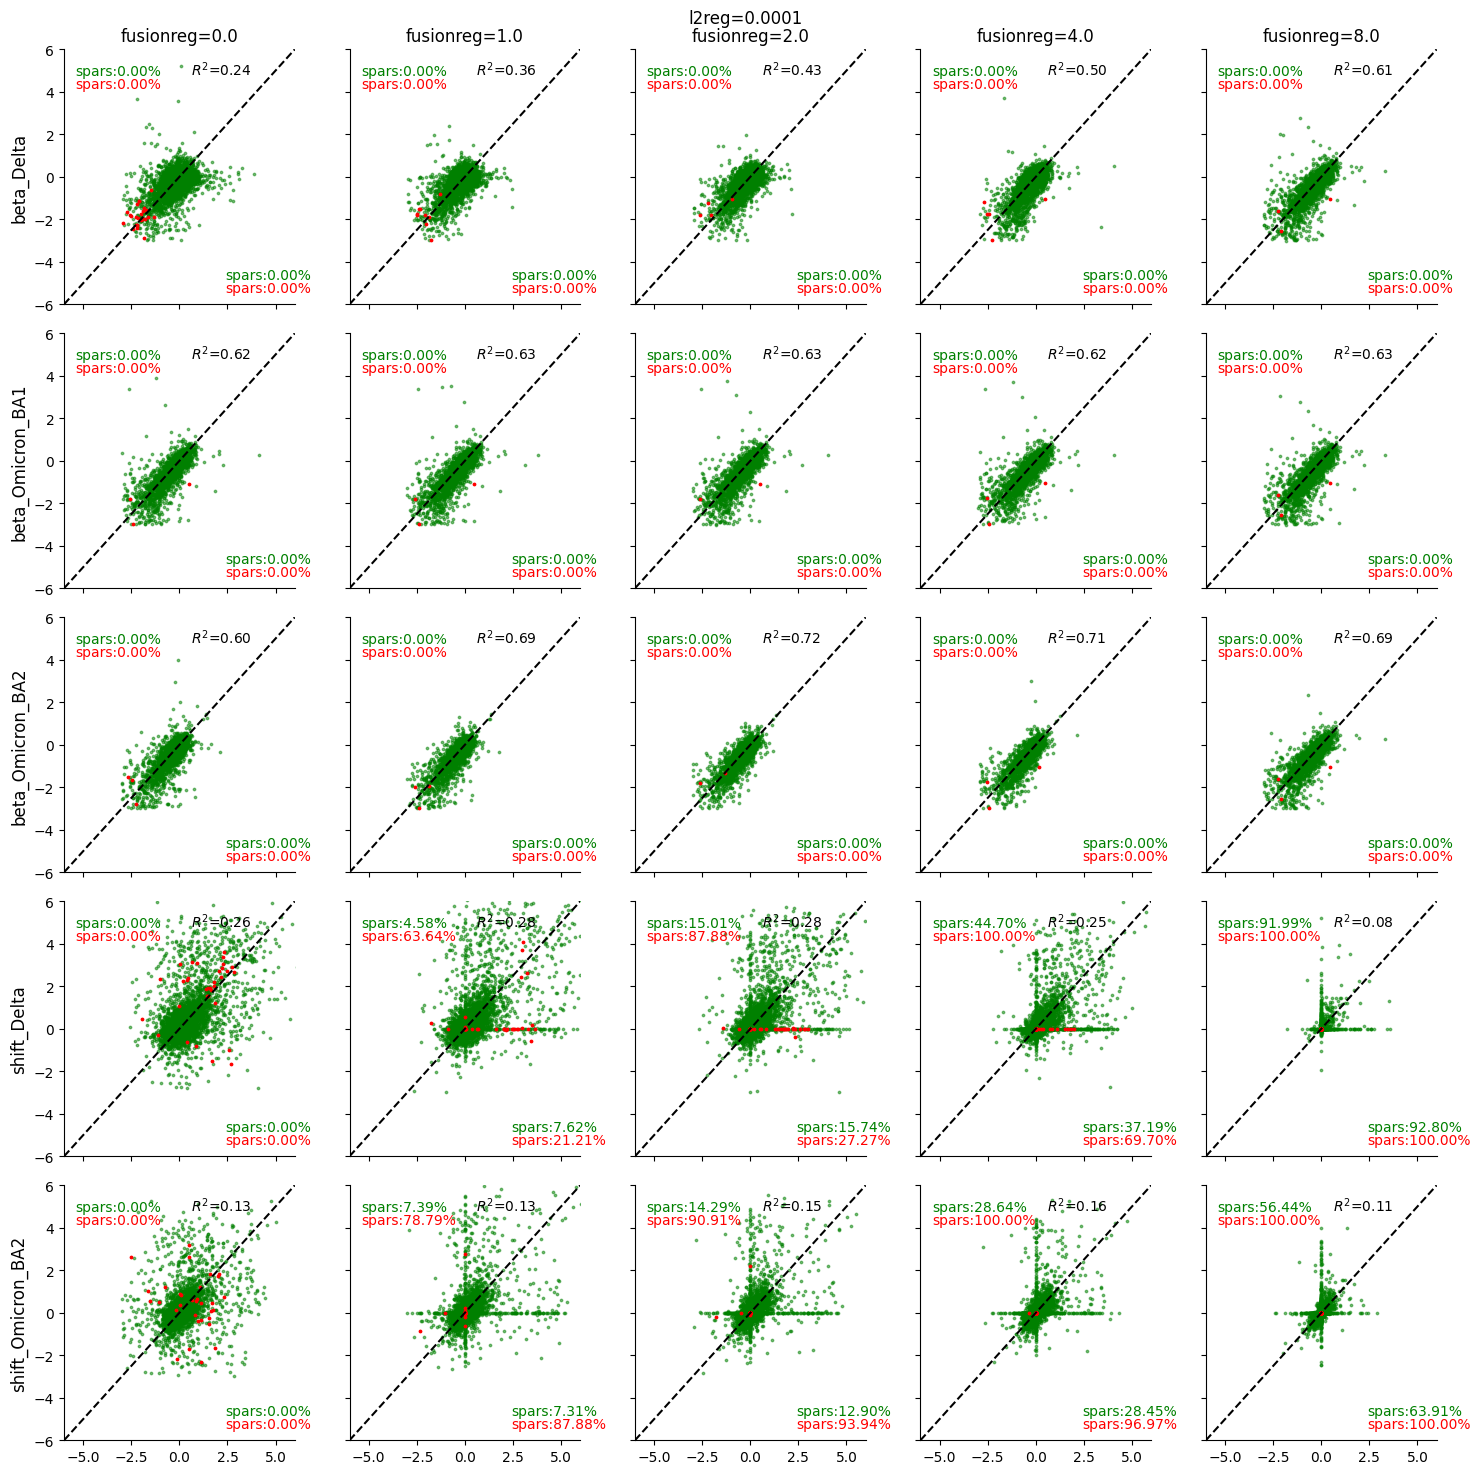

In [10]:
# use facets to create a scatter with column '1' on the x and column '2' on the y, facetted by parameter, fusionreg, and l2reg
for l2reg, df in tall_mut_df_collection.query(f"parameter != 'shift_Omicron_BA1'").dropna().groupby("l2reg"):

    # loop through each
    num_rows = len(df["parameter"].unique())
    num_cols = len(df["fusionreg"].unique())
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols*3, num_rows*3), sharex=True, sharey=True, squeeze=False)

    for row, (parameter, sub_df) in enumerate(df.groupby("parameter")):
        for col, (fusionreg, sub_sub_df) in enumerate(sub_df.groupby("fusionreg")):
        
            iter_ax = ax[row, col]
            iter_ax.plot([0, 1], [0, 1], transform=iter_ax.transAxes, color="black", linestyle="--")

            iter_ax.scatter(
                sub_sub_df.query("~is_stop")["1"], sub_sub_df.query("~is_stop")["2"],
                color="green",
                alpha=0.5,
                s=3,
            )
            iter_ax.scatter(
                sub_sub_df.query("is_stop")["1"], sub_sub_df.query("is_stop")["2"],
                color="red",
                s=3,
            )
            # compute R squared and annotate figure
            r_squared = scipy.stats.pearsonr(sub_sub_df["1"], sub_sub_df["2"]).statistic ** 2
            iter_ax.annotate(f"$R^2$={r_squared:.2f}", xy=(0.55, 0.90), xycoords='axes fraction')

            # compute percentage of muts that are equal to zero for both stop, and non-stop mutations
            non_stop_zero = (sub_sub_df.query("~is_stop")["1"] == 0).mean()
            iter_ax.annotate(f"spars:{non_stop_zero:.2%}", xy=(.7, .10), xycoords='axes fraction', color="green")

            stop_zero = (sub_sub_df.query("is_stop")["1"] == 0).mean()
            iter_ax.annotate(f"spars:{stop_zero:.2%}", xy=(.7, .05), xycoords='axes fraction', color="red")

            non_stop_zero = (sub_sub_df.query("~is_stop")["2"] == 0).mean()
            iter_ax.annotate(f"spars:{non_stop_zero:.2%}", xy=(.05, .9), xycoords='axes fraction', color="green")

            stop_zero = (sub_sub_df.query("is_stop")["2"] == 0).mean()
            iter_ax.annotate(f"spars:{stop_zero:.2%}", xy=(.05, .85), xycoords='axes fraction', color="red")

            iter_ax.set_xlabel(None)
            iter_ax.set_ylabel(None)
            iter_ax.set_xlim(-6, 6)
            iter_ax.set_ylim(-6, 6)

            if row == 0:
                iter_ax.set_title(f"fusionreg={fusionreg}")
            if col == 0:
                iter_ax.set_ylabel(parameter, size=12)
    
    fig.suptitle(f"l2reg={l2reg}")
    sns.despine()
    plt.tight_layout()
    plt.show()
    # break
